In [49]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [50]:
olympicData = pd.read_csv('C:\\Users\\Bruger\\Desktop\\CZ1016\\athlete_events.csv')
olympicData.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


# Filling the NaN values in Medal column with 'NoMedal'

In [51]:
colDrop = ['Name','Games','City'] 
olympicData.drop(columns = colDrop, inplace = True)
olympicData['Medal'] = olympicData['Medal'].fillna('NoMedal')

In [52]:
print(olympicData.info())
print(olympicData['Sport'].value_counts())
print(olympicData['Sport'].unique().shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 12 columns):
ID        271116 non-null int64
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     271116 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 24.8+ MB
None
Athletics                38624
Gymnastics               26707
Swimming                 23195
Shooting                 11448
Cycling                  10859
Fencing                  10735
Rowing                   10595
Cross Country Skiing      9133
Alpine Skiing             8829
Wrestling                 7154
Football                  6745
Sailing                   6586
Equestrianism             6344
Canoeing             

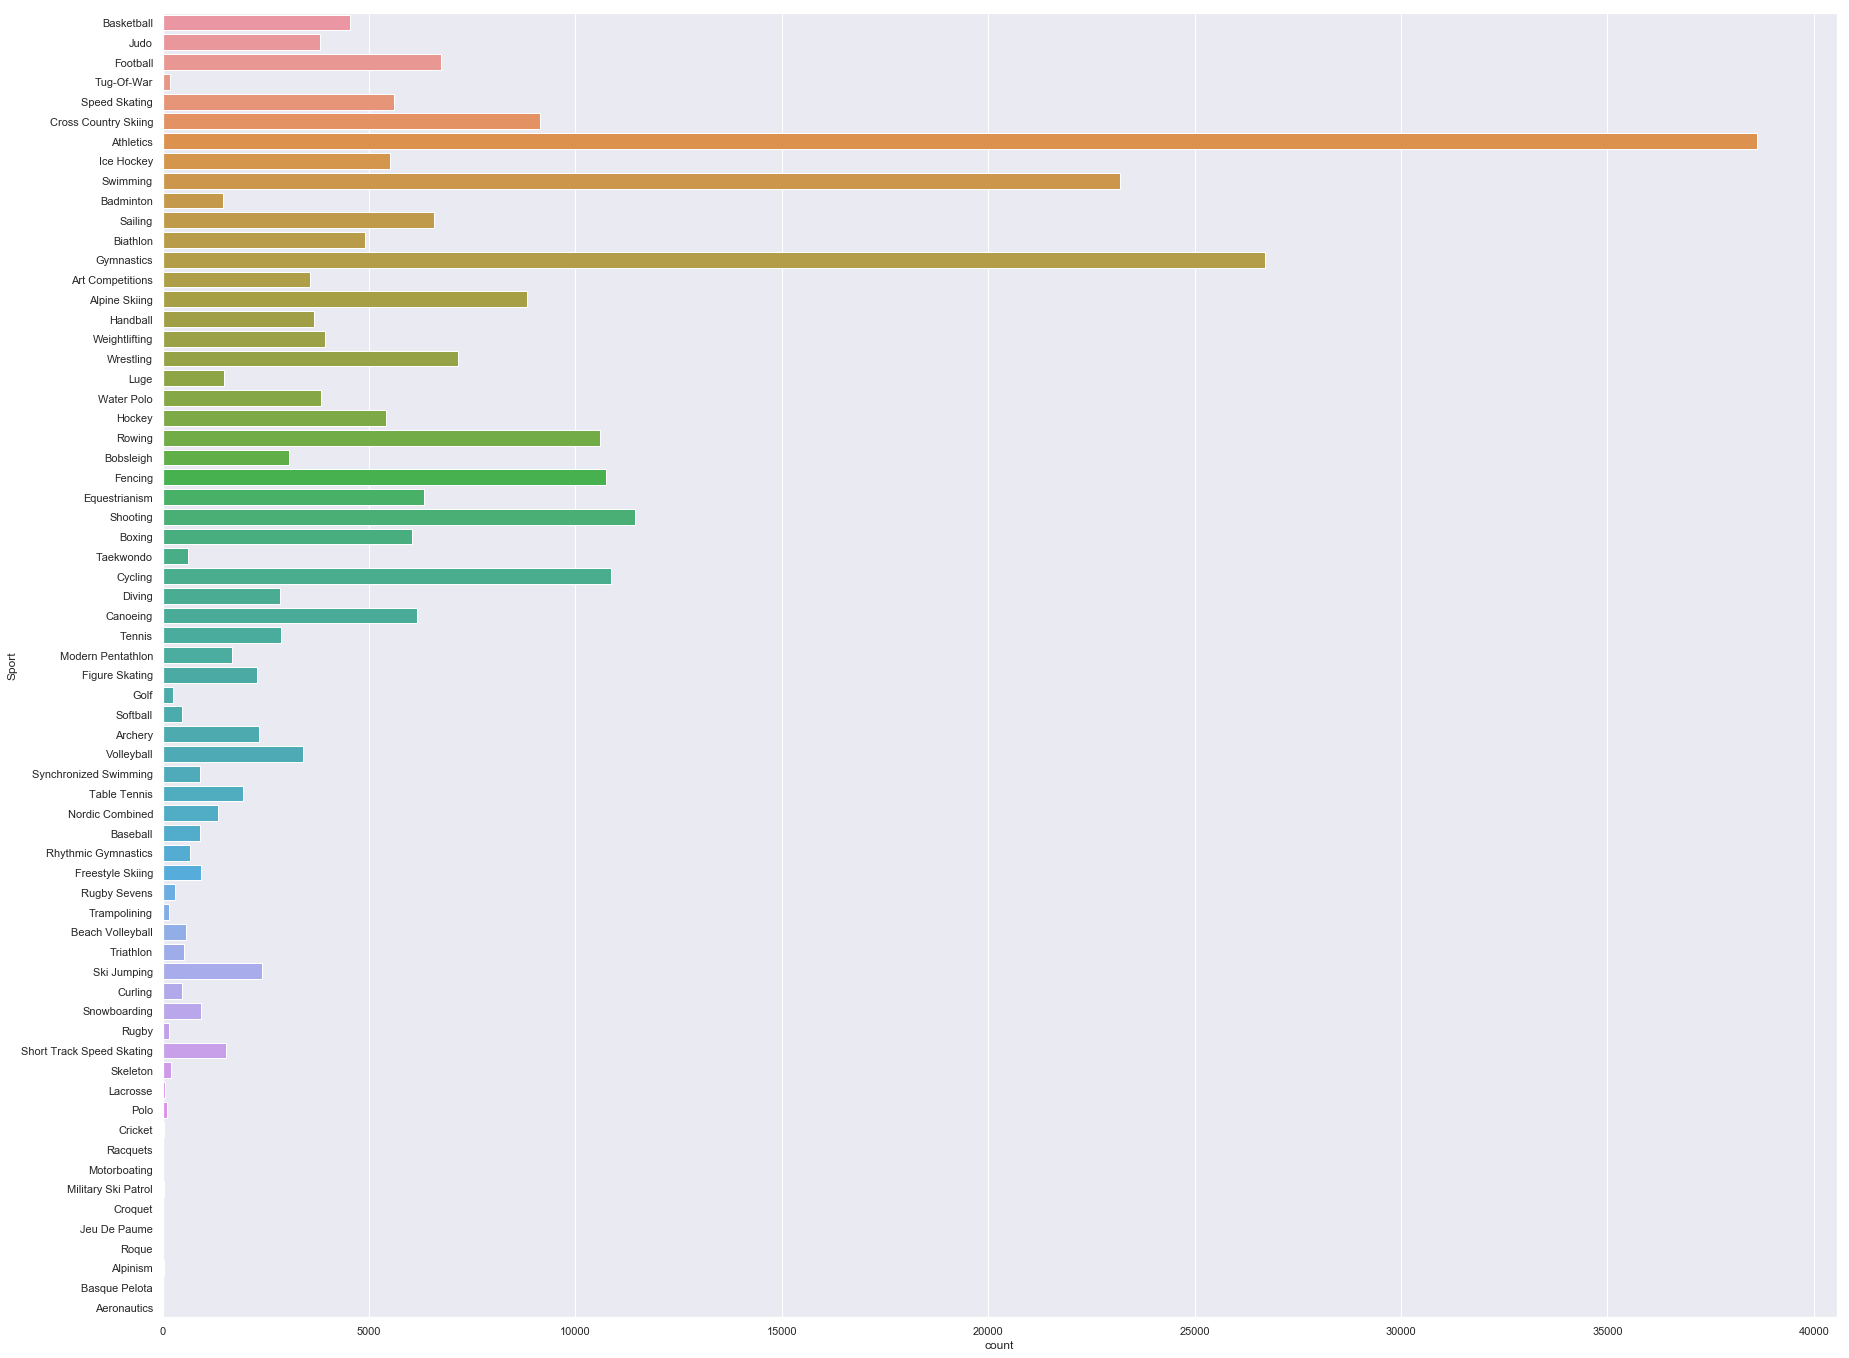

In [53]:
f, axes = plt.subplots(1, 1, figsize=(30, 24))
sb.countplot(y='Sport', data=olympicData)

# checking how data looks like for the sports that have very low counts according to countplot

In [54]:
olympicData[olympicData['Sport'].isin(['Cricket'])]

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal
6892,3871,M,40.0,NaN,NaN,Union des Socits Franais de Sports Athletiques,GBR,1900,Summer,Cricket,Cricket Men's Cricket,Silver
10734,5871,M,NaN,NaN,NaN,Union des Socits Franais de Sports Athletiques,FRA,1900,Summer,Cricket,Cricket Men's Cricket,Silver
16799,9009,M,NaN,NaN,NaN,Devon and Somerset Wanderers,GBR,1900,Summer,Cricket,Cricket Men's Cricket,Gold
22206,11696,M,24.0,NaN,NaN,Devon and Somerset Wanderers,GBR,1900,Summer,Cricket,Cricket Men's Cricket,Gold
27467,14259,M,26.0,NaN,NaN,Devon and Somerset Wanderers,GBR,1900,Summer,Cricket,Cricket Men's Cricket,Gold
28092,14556,M,NaN,NaN,NaN,Union des Socits Franais de Sports Athletiques,GBR,1900,Summer,Cricket,Cricket Men's Cricket,Silver
30259,15626,M,NaN,NaN,NaN,Union des Socits Franais de Sports Athletiques,GBR,1900,Summer,Cricket,Cricket Men's Cricket,Silver
31317,16101,M,24.0,NaN,NaN,Devon and Somerset Wanderers,GBR,1900,Summer,Cricket,Cricket Men's Cricket,Gold
32041,16474,M,26.0,NaN,NaN,Devon and Somerset Wanderers,GBR,1900,Summer,Cricket,Cricket Men's Cricket,Gold
41257,21277,M,32.0,NaN,NaN,Devon and Somerset Wanderers,GBR,1900,Summer,Cricket,Cricket Men's Cricket,Gold


In [55]:
olympicData[olympicData['Sport'].isin(['Racquets'])]

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal
10460,5716,M,21.0,NaN,NaN,Great Britain,GBR,1908,Summer,Racquets,Racquets Men's Singles,Bronze
10461,5716,M,21.0,NaN,NaN,Great Britain-1,GBR,1908,Summer,Racquets,Racquets Men's Doubles,Gold
29911,15435,M,19.0,NaN,NaN,Great Britain,GBR,1908,Summer,Racquets,Racquets Men's Singles,Bronze
30250,15621,M,25.0,NaN,NaN,Great Britain,GBR,1908,Summer,Racquets,Racquets Men's Singles,NoMedal
30251,15621,M,25.0,NaN,NaN,Great Britain-2,GBR,1908,Summer,Racquets,Racquets Men's Doubles,Silver
32641,16786,M,23.0,NaN,NaN,Great Britain-2,GBR,1908,Summer,Racquets,Racquets Men's Doubles,Silver
134199,67568,M,45.0,NaN,NaN,Great Britain,GBR,1908,Summer,Racquets,Racquets Men's Singles,Silver
134200,67568,M,45.0,NaN,NaN,Great Britain-3,GBR,1908,Summer,Racquets,Racquets Men's Doubles,Bronze
172624,86723,M,29.0,NaN,NaN,Great Britain,GBR,1908,Summer,Racquets,Racquets Men's Singles,Gold
172625,86723,M,29.0,NaN,NaN,Great Britain-3,GBR,1908,Summer,Racquets,Racquets Men's Doubles,Bronze


In [56]:
olympicData[olympicData['Sport'].isin(['Motorboating'])]

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal
10649,5822,M,NaN,NaN,NaN,Wolseley-Siddeley-1,GBR,1908,Summer,Motorboating,Motorboating Mixed A-Class (Open),NoMedal
42820,22095,M,31.0,NaN,NaN,Wolseley-Siddeley-1,GBR,1908,Summer,Motorboating,Motorboating Mixed A-Class (Open),NoMedal
67772,34641,M,40.0,NaN,NaN,Dylan-2,GBR,1908,Summer,Motorboating,Motorboating Mixed A-Class (Open),NoMedal
69015,35191,M,29.0,NaN,NaN,Gyrinus-1,GBR,1908,Summer,Motorboating,Motorboating Mixed B-Class (Under 60 Feet),Gold
69016,35191,M,29.0,NaN,NaN,Gyrinus-1,GBR,1908,Summer,Motorboating,Motorboating Mixed C-Class,Gold
82390,41856,M,54.0,NaN,NaN,Quicksilver-2,GBR,1908,Summer,Motorboating,Motorboating Mixed B-Class (Under 60 Feet),NoMedal
82391,41857,F,26.0,NaN,NaN,Quicksilver-2,GBR,1908,Summer,Motorboating,Motorboating Mixed B-Class (Under 60 Feet),NoMedal
99444,50334,M,27.0,181.0,77.0,Dylan-2,GBR,1908,Summer,Motorboating,Motorboating Mixed A-Class (Open),NoMedal
133820,67386,M,40.0,NaN,NaN,Wolseley-Siddeley-1,GBR,1908,Summer,Motorboating,Motorboating Mixed A-Class (Open),NoMedal
198177,99504,M,33.0,NaN,NaN,Gyrinus-1,GBR,1908,Summer,Motorboating,Motorboating Mixed B-Class (Under 60 Feet),Gold


In [57]:
olympicData[olympicData['Sport'].isin(['Military Ski Patrol'])]

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal
10854,5932,M,26.0,NaN,NaN,Switzerland,SUI,1924,Winter,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,Gold
20555,10841,M,20.0,NaN,NaN,France,FRA,1924,Winter,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,Bronze
21412,11302,M,NaN,NaN,NaN,Italy,ITA,1924,Winter,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,NoMedal
21910,11555,M,23.0,NaN,NaN,Czechoslovakia,TCH,1924,Winter,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,NoMedal
28801,14916,M,24.0,NaN,NaN,Finland,FIN,1924,Winter,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,Silver
31248,16064,M,26.0,NaN,NaN,Czechoslovakia,TCH,1924,Winter,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,NoMedal
41380,21340,M,21.0,NaN,NaN,Poland,POL,1924,Winter,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,NoMedal
53905,27652,M,NaN,NaN,NaN,Italy,ITA,1924,Winter,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,NoMedal
64818,33160,M,25.0,NaN,NaN,Finland,FIN,1924,Winter,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,Silver
72038,36649,M,NaN,NaN,NaN,Italy,ITA,1924,Winter,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,NoMedal


In [58]:
olympicData[olympicData['Sport'].isin(['Croquet'])]

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal
10961,5989,M,15.0,NaN,NaN,France,FRA,1900,Summer,Croquet,"Croquet Mixed Singles, One Ball",Gold
10962,5989,M,15.0,NaN,NaN,France,FRA,1900,Summer,Croquet,Croquet Mixed Doubles,Gold
22751,11969,M,NaN,NaN,NaN,France,FRA,1900,Summer,Croquet,"Croquet Mixed Singles, One Ball",NoMedal
22752,11969,M,NaN,NaN,NaN,France,FRA,1900,Summer,Croquet,"Croquet Mixed Singles, Two Balls",NoMedal
54280,27851,F,NaN,NaN,NaN,France,FRA,1900,Summer,Croquet,"Croquet Mixed Singles, One Ball",NoMedal
54281,27851,F,NaN,NaN,NaN,France,FRA,1900,Summer,Croquet,"Croquet Mixed Singles, Two Balls",NoMedal
69403,35364,F,33.0,NaN,NaN,France,FRA,1900,Summer,Croquet,"Croquet Mixed Singles, One Ball",NoMedal
69404,35364,F,33.0,NaN,NaN,France,FRA,1900,Summer,Croquet,"Croquet Mixed Singles, Two Balls",NoMedal
88053,44641,M,30.0,NaN,NaN,France,FRA,1900,Summer,Croquet,"Croquet Mixed Singles, One Ball",NoMedal
88054,44641,M,30.0,NaN,NaN,France,FRA,1900,Summer,Croquet,"Croquet Mixed Singles, Two Balls",NoMedal


In [59]:
olympicData[olympicData['Sport'].isin(['Jeu De Paume'])]

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal
21488,11349,M,30.0,NaN,NaN,Great Britain,GBR,1908,Summer,Jeu De Paume,Jeu De Paume Men's Singles,NoMedal
37344,19192,M,42.0,NaN,NaN,Great Britain,GBR,1908,Summer,Jeu De Paume,Jeu De Paume Men's Singles,NoMedal
82805,42060,M,19.0,NaN,NaN,United States,USA,1908,Summer,Jeu De Paume,Jeu De Paume Men's Singles,Gold
144851,72692,M,29.0,NaN,NaN,Great Britain,GBR,1908,Summer,Jeu De Paume,Jeu De Paume Men's Singles,Bronze
158944,79794,M,39.0,NaN,NaN,Great Britain,GBR,1908,Summer,Jeu De Paume,Jeu De Paume Men's Singles,Silver
172623,86723,M,29.0,NaN,NaN,Great Britain,GBR,1908,Summer,Jeu De Paume,Jeu De Paume Men's Singles,NoMedal
180169,90545,M,32.0,NaN,NaN,Great Britain,GBR,1908,Summer,Jeu De Paume,Jeu De Paume Men's Singles,NoMedal
180736,90836,M,21.0,NaN,NaN,Great Britain,GBR,1908,Summer,Jeu De Paume,Jeu De Paume Men's Singles,NoMedal
185106,93046,M,31.0,176.0,NaN,Great Britain,GBR,1908,Summer,Jeu De Paume,Jeu De Paume Men's Singles,NoMedal
209896,105390,M,42.0,181.0,NaN,United States,USA,1908,Summer,Jeu De Paume,Jeu De Paume Men's Singles,NoMedal


In [60]:
olympicData[olympicData['Sport'].isin(['Roque'])]

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal
29994,15484,M,37.0,NaN,NaN,United States,USA,1904,Summer,Roque,Roque Men's Singles,Bronze
38126,19593,M,NaN,NaN,NaN,United States,USA,1904,Summer,Roque,Roque Men's Singles,NoMedal
105199,53238,M,64.0,NaN,NaN,United States,USA,1904,Summer,Roque,Roque Men's Singles,Gold
230588,115733,M,59.0,NaN,NaN,United States,USA,1904,Summer,Roque,Roque Men's Singles,Silver


In [61]:
olympicData[olympicData['Sport'].isin(['Alpinism'])]

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal
30323,15656,M,57.0,NaN,NaN,Great Britain,GBR,1924,Winter,Alpinism,Alpinism Mixed Alpinism,Gold
30328,15659,M,27.0,NaN,NaN,Great Britain,GBR,1924,Winter,Alpinism,Alpinism Mixed Alpinism,Gold
32015,16457,M,NaN,NaN,NaN,Nepal,NEP,1924,Winter,Alpinism,Alpinism Mixed Alpinism,Gold
45937,23708,M,33.0,NaN,NaN,Great Britain,GBR,1924,Winter,Alpinism,Alpinism Mixed Alpinism,Gold
60639,31056,M,49.0,NaN,NaN,Switzerland,SUI,1936,Summer,Alpinism,Alpinism Mixed Alpinism,Gold
60641,31057,F,43.0,NaN,NaN,Switzerland,SUI,1936,Summer,Alpinism,Alpinism Mixed Alpinism,Gold
69438,35388,M,35.0,NaN,NaN,Australia,AUS,1924,Winter,Alpinism,Alpinism Mixed Alpinism,Gold
142022,71241,M,49.0,NaN,NaN,Great Britain,GBR,1924,Winter,Alpinism,Alpinism Mixed Alpinism,Gold
147743,74134,M,37.0,NaN,NaN,Great Britain,GBR,1924,Winter,Alpinism,Alpinism Mixed Alpinism,Gold
163906,82259,M,NaN,NaN,NaN,Great Britain,GBR,1924,Winter,Alpinism,Alpinism Mixed Alpinism,Gold


In [62]:
olympicData[olympicData['Sport'].isin(['Basque Pelota'])]

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal
50275,25866,M,26.0,NaN,NaN,Spain,ESP,1900,Summer,Basque Pelota,Basque Pelota Men's Two-Man Teams With Cesta,Gold
252988,126675,M,26.0,NaN,NaN,Spain,ESP,1900,Summer,Basque Pelota,Basque Pelota Men's Two-Man Teams With Cesta,Gold


In [63]:
olympicData[olympicData['Sport'].isin(['Aeronautics'])]

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal
214105,107506,M,26.0,NaN,NaN,Switzerland,SUI,1936,Summer,Aeronautics,Aeronautics Mixed Aeronautics,Gold


# Removing above sports as they existed only for a year, they have low count and contain missing values in Height, Weight or Age

In [64]:
sportCol = ['Cricket','Racquets','Motorboating','Military Ski Patrol','Croquet','Jeu De Paume','Roque','Alpinism','Basque Pelota','Aeronautics']
olympicData = olympicData[~olympicData['Sport'].isin(sportCol)]

In [65]:
olympicData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270977 entries, 0 to 271115
Data columns (total 12 columns):
ID        270977 non-null int64
Sex       270977 non-null object
Age       261530 non-null float64
Height    210940 non-null float64
Weight    208240 non-null float64
Team      270977 non-null object
NOC       270977 non-null object
Year      270977 non-null int64
Season    270977 non-null object
Sport     270977 non-null object
Event     270977 non-null object
Medal     270977 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 26.9+ MB


# Filling the NaN Height, Weight, Age with mean for every country and sex

In [66]:
#Making a new DF with only these columns
CalcMean = olympicData[['Height', 'Weight','Age','NOC','Sex']]
#Finding out mean height, weight and age for each NOC + Sex combination
AvgData = CalcMean.groupby(['NOC', 'Sex']).mean()
#Renaming the columns, so it is easier to understand their meanings later
AvgData.rename(columns={'Height': 'AvgHeight', 'Weight': 'AvgWeight', 'Age':'AvgAge'}, inplace=True)
AvgData.head()

AvgHeight  AvgWeight     AvgAge
NOC Sex                                  
AFG F    170.000000  57.800000  20.200000
    M    170.653061  66.625000  23.767123
AHO F    170.000000  59.000000  23.833333
    M    178.266667  78.466667  27.090909
ALB F    165.480000  57.440000  26.740741

In [67]:
olympicData.head()

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal
0,1,M,24.0,180.0,80.0,China,CHN,1992,Summer,Basketball,Basketball Men's Basketball,NoMedal
1,2,M,23.0,170.0,60.0,China,CHN,2012,Summer,Judo,Judo Men's Extra-Lightweight,NoMedal
2,3,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Football,Football Men's Football,NoMedal
3,4,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NoMedal


# So, we notice that ID 3 and 4 have missing Height and Weight values, this will be used for verification later

In [68]:
# merging main DF with the average data DF to get the average values as separate columns
olympicData = pd.merge(olympicData, AvgData, on = ['NOC','Sex'])

In [69]:
#Assigning average values to missing values
olympicData['Height'] = olympicData['Height'].fillna(olympicData['AvgHeight'])
olympicData['Weight'] = olympicData['Weight'].fillna(olympicData['AvgWeight'])
olympicData['Age'] = olympicData['Age'].fillna(olympicData['AvgAge'])

In [70]:
#sort by id and verify
olympicData.sort_values(['ID']).head()

,ID,Sex,Age,Height,Weight,Team,NOC,Year,Season,Sport,Event,Medal,AvgHeight,AvgWeight,AvgAge
0,1,M,24.0,180.000000,80.000000,China,CHN,1992,Summer,Basketball,Basketball Men's Basketball,NoMedal,177.615524,72.953146,23.726769
1,2,M,23.0,170.000000,60.000000,China,CHN,2012,Summer,Judo,Judo Men's Extra-Lightweight,NoMedal,177.615524,72.953146,23.726769
2371,3,M,24.0,181.527607,77.607492,Denmark,DEN,1920,Summer,Football,Football Men's Football,NoMedal,181.527607,77.607492,27.763324
2372,4,M,34.0,181.527607,77.607492,Denmark/Sweden,DEN,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,181.527607,77.607492,27.763324
5231,5,F,21.0,185.000000,82.000000,Netherlands,NED,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NoMedal,172.382463,63.725428,24.157046


In [71]:
olympicData['Height'] = olympicData['Height']/100 #converting height into metres

In [72]:
olympicData['BMI'] = olympicData['Weight']/(olympicData['Height']** 2) #calculating BMI

# now we can remove the NaN values as their count is very low

In [73]:
#they are not needed any more
olympicData.drop(columns=['AvgHeight', 'AvgWeight','AvgAge'], inplace = True)
#Before removing missing values
olympicData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270977 entries, 0 to 270976
Data columns (total 13 columns):
ID        270977 non-null int64
Sex       270977 non-null object
Age       270964 non-null float64
Height    270869 non-null float64
Weight    270720 non-null float64
Team      270977 non-null object
NOC       270977 non-null object
Year      270977 non-null int64
Season    270977 non-null object
Sport     270977 non-null object
Event     270977 non-null object
Medal     270977 non-null object
BMI       270718 non-null float64
dtypes: float64(4), int64(2), object(7)
memory usage: 28.9+ MB


In [74]:
olympicData.dropna(inplace = True)
#After removing missing values
olympicData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270718 entries, 0 to 270974
Data columns (total 13 columns):
ID        270718 non-null int64
Sex       270718 non-null object
Age       270718 non-null float64
Height    270718 non-null float64
Weight    270718 non-null float64
Team      270718 non-null object
NOC       270718 non-null object
Year      270718 non-null int64
Season    270718 non-null object
Sport     270718 non-null object
Event     270718 non-null object
Medal     270718 non-null object
BMI       270718 non-null float64
dtypes: float64(4), int64(2), object(7)
memory usage: 28.9+ MB


In [76]:
# Split the Dataset into Train and Test
BMI = pd.DataFrame(olympicData['BMI'])
sport = pd.DataFrame(olympicData['Sport'])
BMI_train, BMI_test, sport_train, sport_test = train_test_split(BMI, sport, test_size = 0.25)

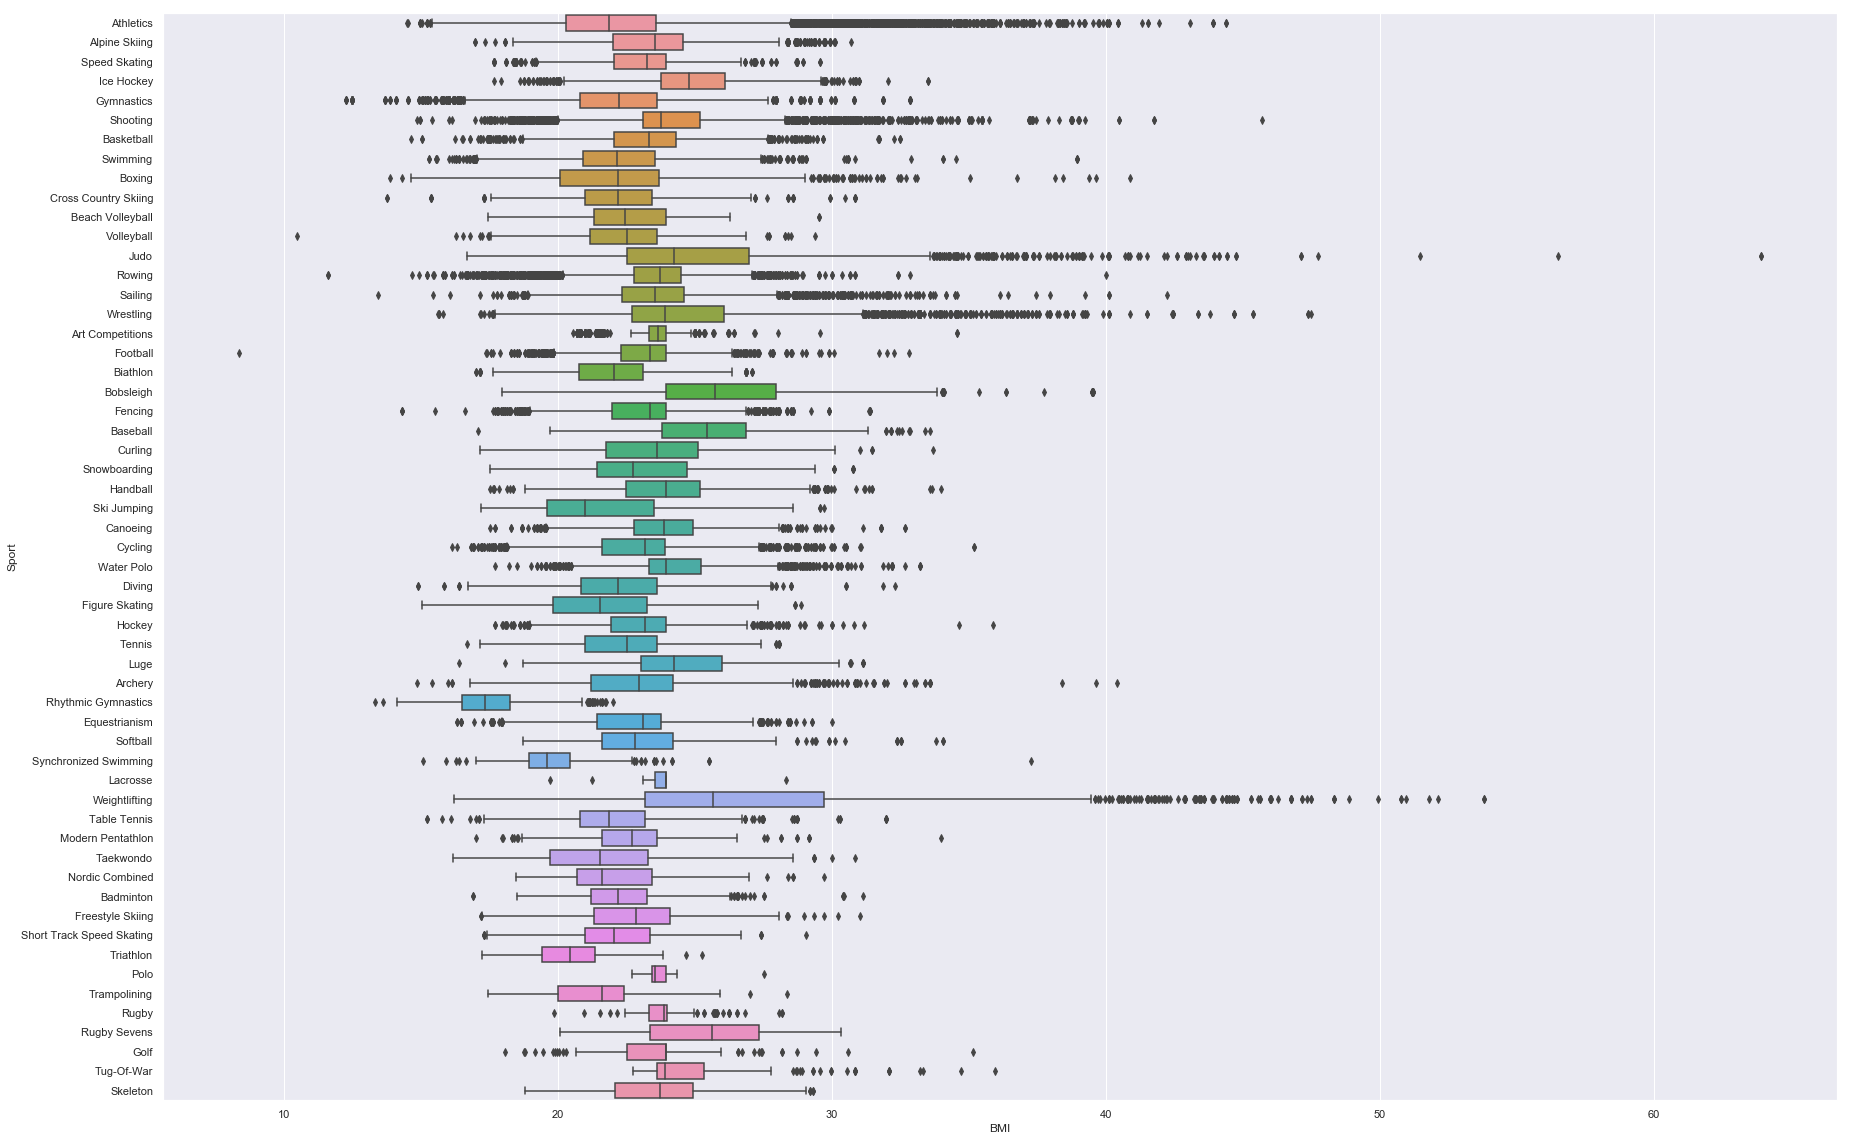

In [79]:
# Create a joint dataframe by concatenating BMI and Sport
jointDF = pd.concat([BMI_train, sport_train], axis = 1, join_axes = [BMI_train.index])

# Joint Swarmplot of BMI Train against Sport Train
f, axes = plt.subplots(1, 1, figsize=(30, 20))
sb.boxplot(x = 'BMI', y = 'Sport', data = jointDF, orient = "h")